In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [18]:
# Load the dataset
df = pd.read_csv('condo.csv')

In [19]:
# Data Cleaning
# Handle missing values and duplicates
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
# Distribution of properties
print(df['Neighborhood'].value_counts())
print(df['Building Classification'].value_counts())

Neighborhood
FLUSHING-NORTH             1100
UPPER EAST SIDE (59-79)     884
HARLEM-CENTRAL              791
CHELSEA                     685
BEDFORD STUYVESANT          655
                           ... 
2999                          1
30TH Q BROOKLYN               1
QN04                          1
EAST ELMHURST                 1
ST. ALBANS                    1
Name: count, Length: 180, dtype: int64
Building Classification
R4-ELEVATOR       6350
R4-CONDOMINIUM    5195
R4  -ELEVATOR     3823
R2-WALK-UP        1391
R2-CONDOMINIUM    1318
R2  -WALK-UP       908
R9-CONDOPS         735
R9-CONDOMINIUM     659
RR  -CONRENT       550
R9  -CONDOPS       412
RR-CONRENT         379
RR-CONDOMINIUM     274
RR-CONRENTAL        76
Name: count, dtype: int64


In [20]:
# Summary statistics for financial variables
print(df[['Estimated Gross Income', 'Estimated Expense', 'Net Operating Income', 'Full Market Value']].describe())


       Estimated Gross Income  Estimated Expense  Net Operating Income  \
count            2.207000e+04       2.207000e+04          2.207000e+04   
mean             2.680577e+06       8.823195e+05          1.798266e+06   
std              4.770923e+06       1.595256e+06          3.283898e+06   
min              3.400000e+01       1.200000e+01          2.200000e+01   
25%              4.428100e+05       1.559565e+05          2.766158e+05   
50%              9.806740e+05       3.446615e+05          6.161710e+05   
75%              2.663329e+06       9.039310e+05          1.750144e+06   
max              6.409312e+07       3.512577e+07          4.300361e+07   

       Full Market Value  
count       2.207000e+04  
mean        1.396416e+07  
std         2.562102e+07  
min         3.100000e+01  
25%         2.086998e+06  
50%         4.687500e+06  
75%         1.350576e+07  
max         3.461330e+08  


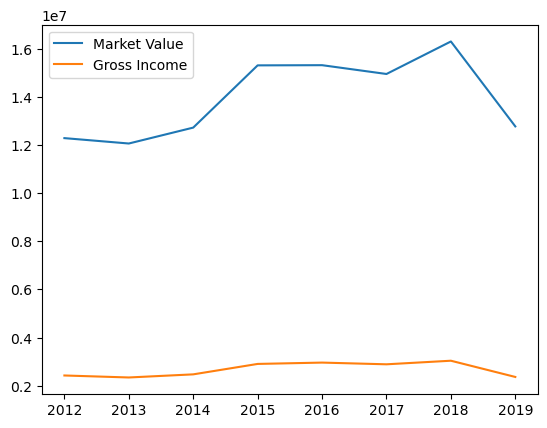

In [21]:
# Trend Analysis
# Analyzing trends in market value and income over time
market_value_trends = df.groupby('Report Year')['Full Market Value'].mean()
income_trends = df.groupby('Report Year')['Estimated Gross Income'].mean()

plt.plot(market_value_trends, label='Market Value')
plt.plot(income_trends, label='Gross Income')
plt.legend()
plt.show()

In [22]:
# Profitability Analysis
# Profit margins and net operating income
df['Profit Margin'] = df['Net Operating Income'] / df['Estimated Gross Income']
profitable_neighborhoods = df.groupby('Neighborhood')['Profit Margin'].mean().sort_values(ascending=False)
print(profitable_neighborhoods.head())

Neighborhood
EAST ELMHURST    0.770816
QN04             0.750114
15TH Q QUEENS    0.746760
FLATIRON         0.744970
CHELSEA          0.736381
Name: Profit Margin, dtype: float64


In [23]:
# Market Value Analysis
# Comparative market analysis
market_value_by_neighborhood = df.groupby('Neighborhood')['Full Market Value'].mean()
print(market_value_by_neighborhood.sort_values(ascending=False).head())

Neighborhood
BRONX-UNKNOWN    8.604153e+07
PARKCHESTER      8.427149e+07
KIPS BAY         6.170648e+07
2999             6.012999e+07
MIDTOWN CBD      5.806160e+07
Name: Full Market Value, dtype: float64


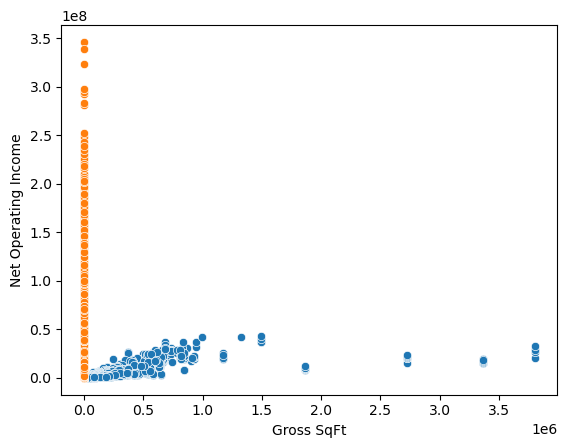

In [24]:
# Size and Age Analysis
# Impact on profitability and market value
sns.scatterplot(x='Gross SqFt', y='Net Operating Income', data=df)
sns.scatterplot(x='Year Built', y='Full Market Value', data=df)
plt.show()


In [25]:
# Investment Opportunities
# Calculating ROI and cap rate
df['ROI'] = df['Net Operating Income'] / df['Full Market Value']
investment_opportunities = df[df['ROI'] > 0.05]  # Threshold for ROI, adjust based on business standards


In [26]:
# Predictive Modeling (Optional)
# Linear regression model to predict market value based on property characteristics
X = df[['Gross SqFt', 'Total Units']]  # Add more features relevant for prediction
y = df['Full Market Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error for Market Value Prediction: {mse}')

Mean Squared Error for Market Value Prediction: 276861885554926.94


In [27]:
# Report Generation
# Generate a summary report with insights and recommendations

print("Analysis complete. Reports and figures are saved.")

Analysis complete. Reports and figures are saved.
